In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
file_path = 'dsets/group_num/group_5565.csv'
data = pd.read_csv(file_path)

# 타임스탬프 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(input_data['tm'])

# 년, 월, 일 컬럼 추가
data['year'] = data['tm'].dt.year
data['month'] = data['tm'].dt.month
data['day'] = data['tm'].dt.day

data = data.drop(columns=['tm'])

print(data.head(5))

   Index   num  hh24   n  stn  sum_qctr  sum_load  n_mean_load  nph_ta  \
0   8761  5565     1  58  184     42250   4468.72    79.776051     2.3   
1   8762  5565     2  58  184     42250   4101.00    79.776051     2.5   
2   8763  5565     3  58  184     42250   3724.60    79.776051     2.8   
3   8764  5565     4  58  184     42250   3484.40    79.776051     2.8   
4   8765  5565     5  58  184     42250   3409.12    79.776051     3.0   

   nph_hm  nph_ws_10m  nph_rn_60m  nph_ta_chi  weekday  week_name   elec  \
0    65.8         1.7         0.0        -0.3        2          0  96.58   
1    69.7         1.8         0.0        -0.2        2          0  88.63   
2    69.5         2.3         0.0        -0.2        2          0  80.50   
3    66.0         1.6         0.0         0.5        2          0  75.31   
4    66.1         1.6         0.0         0.5        2          0  73.68   

   year  month  day  
0  2020      1    1  
1  2020      1    1  
2  2020      1    1  
3  2020   

In [28]:
# 필요한 특성 선택
features = ['num', 'year', 'month', 'day', 'hh24', 'weekday','week_name', 'nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi']
target = 'elec'

# 입력 데이터와 타겟 데이터 분리
input_data = data[features]
target_data = data[[target]]

# 데이터 확인
print(input_data.head())
print(target_data.head())

    num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
0  5565  2020      1    1     1        2          0     2.3    65.8   
1  5565  2020      1    1     2        2          0     2.5    69.7   
2  5565  2020      1    1     3        2          0     2.8    69.5   
3  5565  2020      1    1     4        2          0     2.8    66.0   
4  5565  2020      1    1     5        2          0     3.0    66.1   

   nph_rn_60m  nph_ta_chi  
0         0.0        -0.3  
1         0.0        -0.2  
2         0.0        -0.2  
3         0.0         0.5  
4         0.0         0.5  
    elec
0  96.58
1  88.63
2  80.50
3  75.31
4  73.68


In [32]:
input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32

def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(len(input_data)):
    nph_ta = input_data[input_data['num'] == num]
    cdh = CDH(nph_ta['nph_ta'].values)
    cdhs = np.concatenate([cdhs, cdh])
input_data['CDH'] = cdhs

print(input_data.head(3))

C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_7620\3331459202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32


    num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
0  5565  2020      1    1     1        2          0     2.3    65.8   
1  5565  2020      1    1     2        2          0     2.5    69.7   
2  5565  2020      1    1     3        2          0     2.8    69.5   

   nph_rn_60m  nph_ta_chi        THI   CDH  
0         0.0        -0.3  18.752036 -23.7  
1         0.0        -0.2  19.924991 -47.2  
2         0.0        -0.2  20.415975 -70.4  


C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_7620\3331459202.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['CDH'] = cdhs


In [41]:
print(input_data.shape)
print(target_data.shape)

(26304, 6)
(26304, 1)


##### 스케일링

In [47]:
train_feature = ['nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi', 'THI', 'CDH']
input_data = input_data[train_feature]
print(input_data.head(3))

input_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_input_data = input_scaler.fit_transform(input_data)
scaled_target_data = target_scaler.fit_transform(target_data)

scaled_input_data = pd.DataFrame(scaled_input_data, columns=input_data.columns)
scaled_target_data = pd.DataFrame(scaled_target_data, columns=target_data.columns)

print(scaled_input_data.head(3))
print(scaled_target_data.head(3))

print(scaled_input_data.shape)
print(scaled_target_data.shape)

   nph_ta  nph_hm  nph_rn_60m  nph_ta_chi        THI   CDH
0     2.3    65.8         0.0        -0.3  18.752036 -23.7
1     2.5    69.7         0.0        -0.2  19.924991 -47.2
2     2.8    69.5         0.0        -0.2  20.415975 -70.4
     nph_ta    nph_hm  nph_rn_60m  nph_ta_chi       THI       CDH
0  0.129288  0.581998         0.0    0.199557  0.105847  0.730814
1  0.134565  0.630086         0.0    0.201774  0.123397  0.675663
2  0.142480  0.627620         0.0    0.201774  0.130743  0.621216
       elec
0  0.230114
1  0.178451
2  0.125617
(26304, 6)
(26304, 1)


##### 시퀀스 생성 : 슬라이딩 윈도우 방식 선택

일주일 단위 시퀀스 24 * 7 : 데이터 형태 (n, 24*7, feature_dim)

return_sequences = True로 설정

In [51]:
def create_weekly_sequences(input_data, target_data, sequence_length=7*24):
    input_sequences = []
    target_sequences = []

    # 슬라이딩 윈도우 방식으로 시퀀스 생성
    for start_idx in range(0, len(input_data) - sequence_length + 1, sequence_length):
        end_idx = start_idx + sequence_length
        input_seq = input_data[start_idx:end_idx]
        target_seq = target_data[start_idx:end_idx]
        
        # 시퀀스의 길이가 정확히 168인 경우만 추가
        if len(input_seq) == sequence_length:
            input_sequences.append(input_seq)
            target_sequences.append(target_seq)

    return np.array(input_sequences), np.array(target_sequences)

# 예시 호출
weekly_input_sequences, weekly_target_sequences = create_weekly_sequences(scaled_input_data, scaled_target_data)

print(weekly_input_sequences.shape)
print(weekly_target_sequences.shape)

(156, 168, 6)
(156, 168, 1)


### Model
LSTM : Long Short-Term Memory

In [56]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

layer_1 = 64
layer_2 = 32
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(layer_1, activation='relu', return_sequences=True, input_shape=weekly_input_sequences[0].shape))  # 입력 시퀀스 형태에 맞게 설정
model.add(LSTM(layer_2, activation='relu', return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 구조 요약 출력
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 168, 64)           18176     
                                                                 
 lstm_12 (LSTM)              (None, 168, 32)           12416     
                                                                 
 dense_6 (Dense)             (None, 168, 1)            33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Training data shape: (124, 168, 6) (124, 168, 1)
Testing data shape: (32, 168, 6) (32, 168, 1)
Epoch 1/50
3/3 [==============================] - 0s 83ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 2/50
3/3 [==============================] - 0s 74ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
3/3 [==============================] - 0s 76ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50
3/3 [==============================] - 0s 76ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
3/3 [==============================] - 0s 74ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/50
3/3 [===============

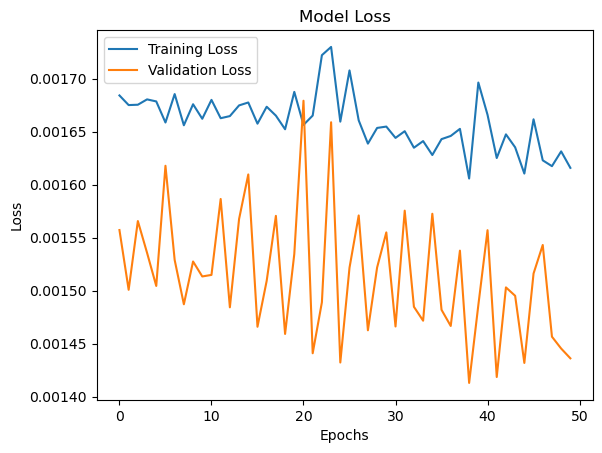

In [67]:
X_train, X_test, y_train, y_test = train_test_split(weekly_input_sequences, weekly_target_sequences, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

epochs = 50
batch_size = 40 # 24*7로 나누면 1096일 정도
# 한 에폭당 한달을 학습시키려면 39-40 정도 : (4, 24*7, f_dim)씩 학습

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=39, validation_split=0.2)

# 모델 저장
model_path = 'test_5565_lstm.h5'
model.save(model_path)

# 손실 값 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 301ms/step


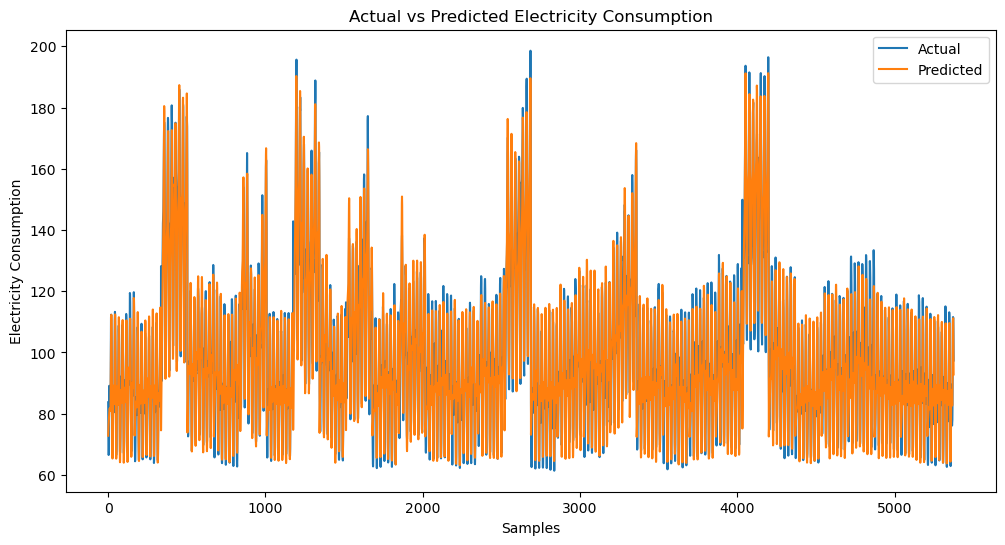

Mean Squared Error: 36.59343525680387


In [68]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 모델 로드
model_path = 'test_5565_lstm.h5'
model = load_model(model_path)


# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 예측 결과 역스케일링
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_pred_inverse = target_scaler.inverse_transform(y_pred_reshaped).reshape(y_pred.shape)
y_test_inverse = target_scaler.inverse_transform(y_test_reshaped).reshape(y_test.shape)

# 예측 결과를 평탄화
y_test_flat = y_test_inverse.flatten()
y_pred_flat = y_pred_inverse.flatten()

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label='Actual')
plt.plot(y_pred_flat, label='Predicted')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Samples')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# 성능 평가
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

In [ ]:
# 한달정도만 테스트하기
